# Data analysis

This script goes through all images and draws the bounding box labels (in red) and cutting line labels (in violet) on the image. 

In [1]:
# Imports
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get all image path names
img_paths = glob.glob('../data/images/*.jpg')

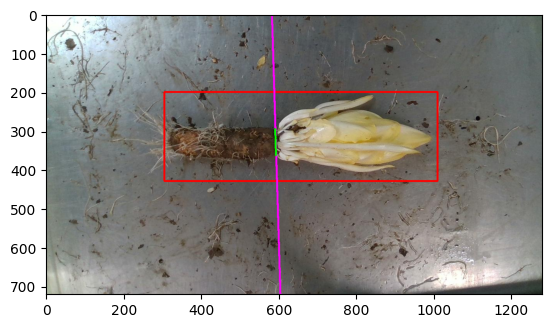

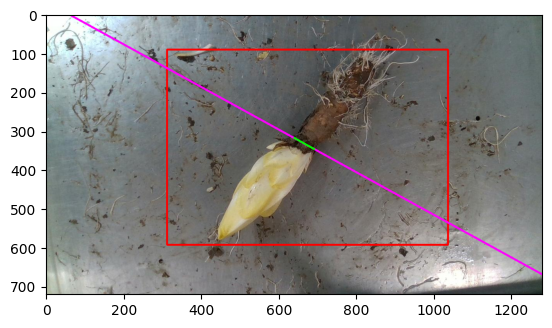

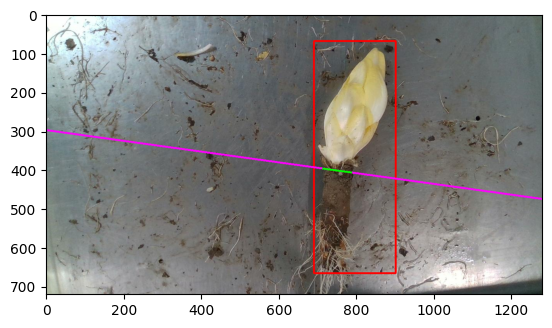

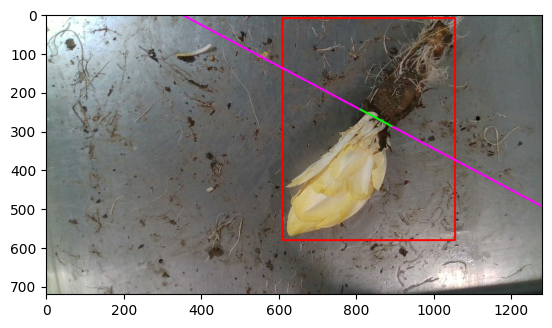

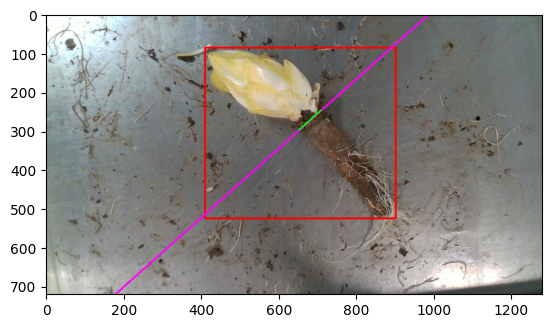

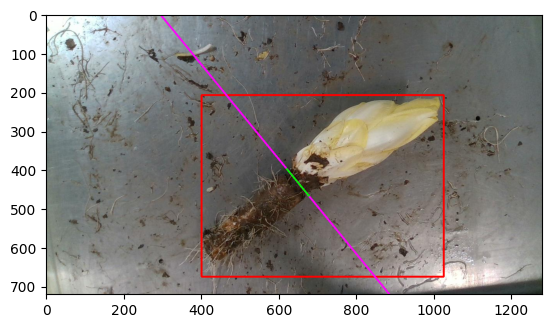

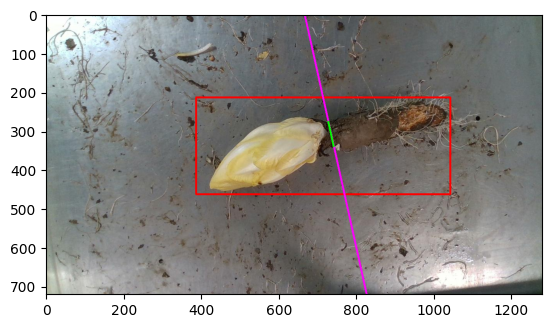

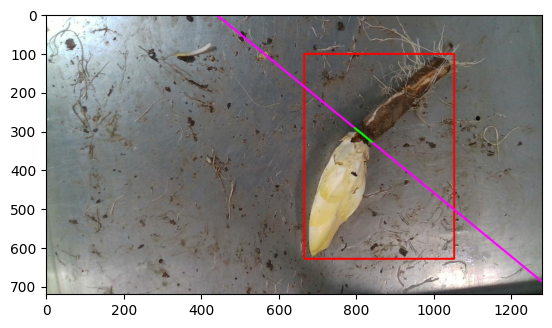

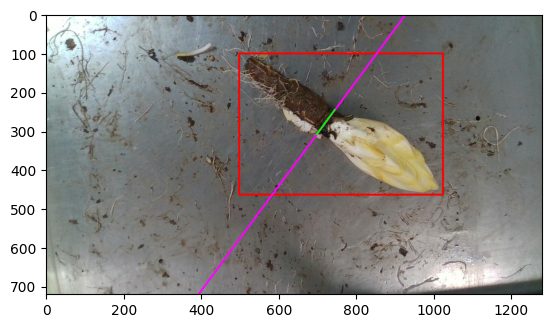

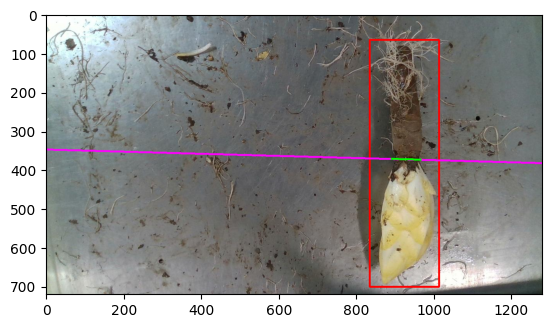

In [3]:
# Loop over the first ten images
for img_path in img_paths[:10]:

	# Read image
	im = cv2.imread(img_path) 
	im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
	height, width, depth = im.shape

	# Get label
	key = img_path.split('\\')[-1].split('.')[0]
	label_file = open("../data/labels/" + key + ".txt", "r")
	labeldata = label_file.read().split(" ")
	line_label = np.array([float(labeldata[4]), float(labeldata[5]), float(labeldata[6]), float(labeldata[7])])

	# Draw ground truth rectangle in red
	cv2.rectangle(im, (int(labeldata[0]), int(labeldata[1])), (int(labeldata[2]), int(labeldata[3])), (255, 0, 0), 3)

	# Convert line points to a slope and an intercept
	a = 0 if (line_label[2] - line_label[0]) == 0 else (line_label[3] - line_label[1]) / (line_label[2] - line_label[0])
	b = line_label[1] - a*line_label[0]

	# Create line points
	start_point = (0, int(a*0 + b))
	end_point = (int(width), int(a*width + b))
	
	# Draw the extended line in violet
	im = cv2.line(im, start_point, end_point, color=(255, 0, 255), thickness=4)

	# Draw ground truth cutting line (based on two points) in green
	cv2.line(im, (int(line_label[0]), int(line_label[1])), (int(line_label[2]), int(line_label[3])), (0, 255, 0), 4) 

	# Show the image
	plt.imshow(im)
	plt.show()